# Chapter 1

Generate the predicted sine function

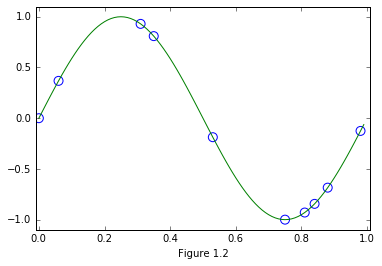

88.8888888889


In [67]:
import numpy as np
import matplotlib.pyplot as plt

# 'x' and 'omega' are the python list
def linearFunction(_x, _omega):
    x = np.array(_x)
    omega = np.array(_omega)
    return x.dot(omega)

# Sample parameters setting
fs = 100 # sample rate 
xLeft = 0.0
xRight = 1.0

mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, fs)

x = np.arange(xLeft, xRight, (xRight - xLeft)/fs)
y = np.sin(2 * np.pi * x)

y_dat = y + s #[ (np.sin(2 * np.pi / fs * f * i) + s) for i in np.arange(fs)]

# print y_dat
rIndex = np.random.choice(range(0, fs), size=10, replace = False)
xDots = [x[i] for i in rIndex]
yDots = [y[i] for i in rIndex]

% matplotlib inline
# showing the exact location of the smaples
# plt.stem(x,y, 'r', )
f, ax = plt.subplots()
ax.plot(x, y, 'g')
# plt.plot(x, y_dat, 'b')
plt.axis([-0.01, 1.01, -1.1, 1.1])
ax.scatter(xDots, yDots, s = 80, facecolors = 'none', edgecolors = 'b')
ax.set_xlabel('Figure 1.2')
plt.show()

nss = 8000.0 / 90.0
print nss
